In [9]:
### https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers


Opis danych:

CLIENTNUM - numer klienta (ID),

Attrition_Flag - informacja o tym, czy konto jest zamknięte / otwarte,

Customer_Age - wiek klienta w latach,

Gender - płeć klienta,

Dependent_count - liczba osób na utrzymaniu,

Education_Level - poziom wykształcenia klienta,

Marital_Status - stan cywilny – singiel, rozwodnik itp,

Income_Category - roczny poziom dochodu w $ w grupach, np. ($40-60k),
Card_Category - rodzaj posiadanej karty kredytowej,
Month_on_book - liczba miesięcy posiadania karty,
Total_Relationship_Count - liczba produktów posiadanych przez klienta,

Months_Inactive_12_mon - liczba miesięcy bezczynności w ciągu ostatniego roku,

Contacts_Count_12_mon - liczba kontaktów w ciągu ostatniego roku,
Credit_Limit - limit karty,

Total_Revolving_Bal - saldo obrotowe,

Avg_Open_To_Buy - średnia różnica pomiędzy limitem karty kredytowej a faktycznym saldem z ostatnich 12mc,

Total_Amt_Chng_Q4_Q1 - zmiana w kwocie wykonanych transakcji kwartał I do kwartał IV

Total_Trans_Amt - kwota wykonanych transakcji przez ostatnich 12mc,

Total_Trans_Ct - liczba wykonanych transakcji przez ostatnich 12mc,

Total_Ct_Chng_Q4_Q1 - zmiana w liczbie wykonanych transakcji kwartał I do kwartał IV,

Avg_Utilization_Ratio - współczynnik wykorzystania karty.

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 - kolumna dodana przez autora, niepochodząca ze źródła (w dalszej części zostanie pominięta),

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 - jak wyżej.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/raw/BankChurners.csv',  # ścieżka url do pliku na GitHub
    sep=',',  # separator kolumn
    header=0,  # wskazujemy, że plik posiada nagłówek
    encoding='UTF-8'  # określamy jakiego kodowania jest plik
    )

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df = df.rename(columns={'CLIENTNUM': 'Client_ID'})

In [6]:
df = df.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ])

In [8]:
df.head()
df.tail(10)

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [10]:
df.shape

(10127, 21)

In [11]:
df.describe()

,Client_ID,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
df.to_csv(
    './BankChurner_ColumnsRenamed.csv',  # adres pliku docelowego
    index=False,  # czy dodajemy do ramki numer wiersza
    sep=';'  # określenie separatora kolumn, będzie istotne później
    )

In [7]:
### import zapisanego pliku csv
df = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/iterim/BankChurner_ColumnsRenamed.csv',
    sep=';'
    )

In [15]:
df.head()

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
df.describe()

,Client_ID,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
df["Attrition_Flag"].unique()  ## kategoryzacja danych, dwie wartości unikalne

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
df["Is_Active"] = 1 #dodano nową kolumnę z samymi jedynkami
is_active = df["Attrition_Flag"] == "Attrited Customer"
df.loc[is_active, "Is_Active"] = 0

# pd.Categorical - zalecane użycie

In [21]:
df.describe()

,Client_ID,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Is_Active
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


In [12]:
df[["Attrition_Flag", "Is_Active"]].drop_duplicates()  #sprawdzenie poprawności kategoryzacji danych

,Attrition_Flag,Is_Active
0,Existing Customer,1
21,Attrited Customer,0


Is_Active - zmienna, którą chcemy wyjaśnić (zmienna zależna)

In [13]:
df["Income_Category"].unique()  #sparwdzamy przedziały wartości dla tej zmiennej ; stosujemy kategoryzację

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [14]:
income_below_40k = df["Income_Category"] == "Less than $40K"
df.loc[income_below_40k, "Income_Category"] = "1. < $40K"

income_below_60k = df["Income_Category"] == "$40K - $60K"
df.loc[income_below_60k, "Income_Category"] = "2. $40K - 60K"

income_below_80k = df["Income_Category"] == "$60K - $80K"
df.loc[income_below_80k, "Income_Category"] = "3. $60K - 80K"

income_below_120k = df["Income_Category"] == "$80K - $120K"
df.loc[income_below_120k, "Income_Category"] = "4. $80K - 120K"

income_above_120k = df["Income_Category"] == "$120K +"
df.loc[income_above_120k, "Income_Category"] = "5. 120K+"

income_unknown = df["Income_Category"] == "Unknown"
df.loc[income_unknown, "Income_Category"] = "6. Unknown"

In [16]:
df["Income_Category"].unique()

array(['3. $60K - 80K', '1. < $40K', '4. $80K - 120K', '2. $40K - 60K',
       '5. 120K+', '6. Unknown'], dtype=object)

In [17]:
uneducated = df["Education_Level"] == "Uneducated"
df.loc[uneducated, "Education_Level"] = "1. Uneducated"

collage = df["Education_Level"] == "College"
df.loc[collage, "Education_Level"] = "2. College"

high_school = df["Education_Level"] == "High School"
df.loc[high_school, "Education_Level"] = "3. High School"

graduate = df["Education_Level"] == "Graduate"
df.loc[graduate, "Education_Level"] = "4. Graduate"

post_graduate = df["Education_Level"] == "Post-Graduate"
df.loc[post_graduate, "Education_Level"] = "5. Post-Graduate"

doctorate = df["Education_Level"] == "Doctorate"
df.loc[doctorate, "Education_Level"] = "6. Doctorate"

unknown = df["Education_Level"] == "Unknown"
df.loc[unknown, "Education_Level"] = "7. Unknown"

In [18]:
df["Education_Level"].unique()

array(['3. High School', '4. Graduate', '1. Uneducated', '7. Unknown',
       '2. College', '5. Post-Graduate', '6. Doctorate'], dtype=object)

In [19]:
blue_cards = df["Card_Category"] == "Blue"
df.loc[blue_cards, "Card_Category"] = "1. Blue"

silver_cards = df["Card_Category"] == "Silver"
df.loc[silver_cards, "Card_Category"] = "2. Silver"

gold_cards = df["Card_Category"] == "Gold"
df.loc[gold_cards, "Card_Category"] = "3. Gold"

platinum_cards = df["Card_Category"] == "Platinum"
df.loc[platinum_cards, "Card_Category"] = "4. Platinum"

In [20]:
df["Card_Category"].unique()

array(['1. Blue', '3. Gold', '2. Silver', '4. Platinum'], dtype=object)

Analiza danych.

Na tym etapie analizy chcemy zidentyfikować grupy, które cechują się większą liczbą odchodzących klientów kart kredytowych.

Procedura do tworzenia analizy

Przed rozpoczęciem analizy warto ujednolicić proces myślenia oraz porównywania, dzięki czemu całość będzie bardziej przejrzysta. Do tego zadania idealnie nada się funkcja, która każdą ze zmiennych przeanalizuje nam w ten sam sposób.

Napiszemy procedurę, która zwróci ramkę danych o następujących kolumnach:


% aktywnych kart,

liczebność grupy,

liczba kart, które się dezaktywowały,

odchylenie od średniej, czyli % kart dezaktywowanych w grupie - % kart dezaktywowanych ogółem. Tutaj dla uproszczenia przyjmiemy, że wynosi 16%.

W zależności od podanego parametru,column_name będzie oznaczał kolumnę, którą chcemy podsumować:


In [23]:
#grupowanie według wybranej kolumny, wykonanie funkcji agregujących na tej grupie dla pola Is_Active
def analyse_column(column_name):
    result = df.groupby(by=[column_name])["Is_Active"].agg([
            "mean",  # określenie średniej
            "count",  # określenie liczebności grupy
            lambda x: sum(1-x),   # liczba kart, które zostały dezaktywowane (0), czyli 1-1=0, czyli aktywnych nie wliczamy
            lambda x: sum(1-x)/len(x) - 0.16  # odchylenie od średniej globalnej
        ])

    # nadanie tabeli opisowych nazw kolumn
    # ponieważ po tym kroku były by dostępne następujące:
    # mean, count, <lambda_0>, <lambda_1>, które nic nie opisują
    result.columns = [
        "Active_Ratio",
        "Group_Size",
        "Deactivated_Amount",
        "Deviation_From_Global"
    ]
    return result

In [24]:
analyse_column("Income_Category")

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Income_Category,,,,
1. < $40K,0.828138,3561,612,0.011862
2. $40K - 60K,0.848603,1790,271,-0.008603
3. $60K - 80K,0.865193,1402,189,-0.025193
4. $80K - 120K,0.842345,1535,242,-0.002345
5. 120K+,0.826685,727,126,0.013315
6. Unknown,0.831835,1112,187,0.008165


In [53]:
import matplotlib.pyplot as plt

def visualize_analysis(df, compare_value):
    plt.figure(figsize=(18,9))  # określenie wymiaru figury (w calach)

    x = df.index.astype(str)  # wartości na osi x
    y = df["Active_Ratio"]  # wartości na osi y

    plt.bar(x, y)  # określenie typu wykresu, jaki chemy wykreślić – tutaj słupkowy

    # stylowanie wykresu
    plt.xlabel("Group")  # dodanie legendy dla osi x
    plt.ylabel("Active ratio")  # dodanie legendy dla osi y
    plt.title("Active ratio by groups")  # nadanie tytułu dla wykresu

    # dodamy również linię poziomą, do której będziemy mogli odnosić poszczególne grupy
    plt.axhline(compare_value, color="red", linestyle="--")

    plt.show()

In [26]:
gender_analysis = analyse_column("Gender")
gender_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Gender,,,,
F,0.826428,5358,930,0.013572
M,0.853848,4769,697,-0.013848


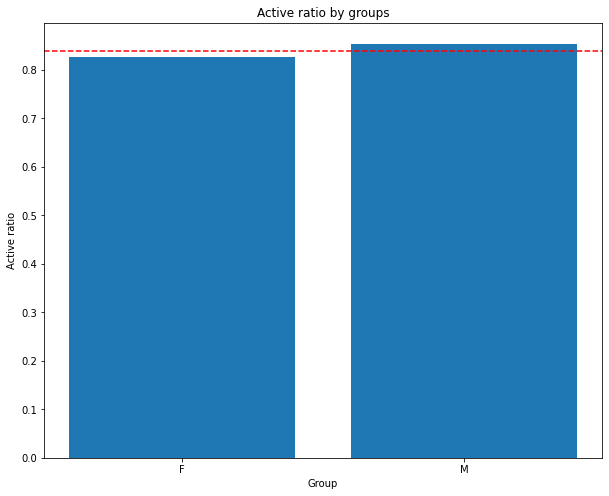

In [29]:
global_mean = df["Is_Active"].mean()  # określenie globalnego poziomu aktywnych kart
visualize_analysis(gender_analysis, global_mean)

In [30]:
### Konkludując, kolumna Gender jest bezużyteczna w kontekście naszego zadania.

In [36]:
## Analiza według Education_level
education_level_analysis = analyse_column("Education_Level")
education_level_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Education_Level,,,,
1. Uneducated,0.840619,1487,237,-0.000619
2. College,0.847976,1013,154,-0.007976
3. High School,0.847988,2013,306,-0.007988
4. Graduate,0.844309,3128,487,-0.004309
5. Post-Graduate,0.821705,516,92,0.018295
6. Doctorate,0.789357,451,95,0.050643
7. Unknown,0.831468,1519,256,0.008532


Na podstawie powyższej tabeli możemy wyciągnąć wniosek, że mamy tutaj jedną grupę, która może istotnie odbiegać od ogólnej średniej - 6. Doctorate. Każe to nam wnioskować, że doktoranci najczęściej przestawali korzystać z kart kredytowych. Zwizualizujmy sobie ten wniosek:

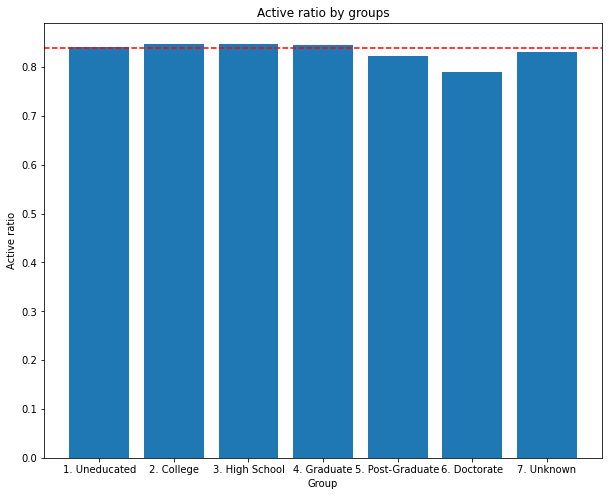

In [37]:

global_mean = df["Is_Active"].mean()  # określenie globalnego poziomu aktywnych kart
visualize_analysis(education_level_analysis, global_mean)

Grupa doktorów jest zbyt mało liczna, żeby dokonywać dalszej jej analizy

In [38]:
## Analiza według Income Category
income_analysis = analyse_column("Income_Category")
income_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Income_Category,,,,
1. < $40K,0.828138,3561,612,0.011862
2. $40K - 60K,0.848603,1790,271,-0.008603
3. $60K - 80K,0.865193,1402,189,-0.025193
4. $80K - 120K,0.842345,1535,242,-0.002345
5. 120K+,0.826685,727,126,0.013315
6. Unknown,0.831835,1112,187,0.008165


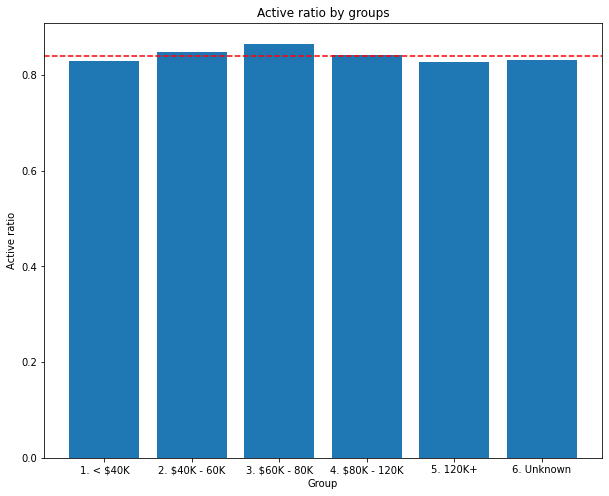

In [39]:
visualize_analysis(income_analysis, global_mean)

Analizując sam wykres możemy powiedzieć, że potencjalną grupą, która się w pewien sposób odchyla jest 3. $60K-80K. Jednak sprawdzając tabelkę, zobaczymy, że liczba dezaktywowanych kart jest mniejsza o niecałe 3% niż ogólnie. Zatem również tutaj nic nie znaleźliśmy.

## **Analiza według Months on book**

Kolumna Months_on_book określa, jak długo karta kredytowa jest już aktywna. Co warto zaznaczyć, do tej pory analizowaliśmy kolumny, które posiadały kategorię. W tym momencie mamy jednak do czynienia ze zmienną 'ciągłą', gdzie kategorie nie występują.

Ponieważ są to dane w rozdzielczości miesięcznej, rozsądnym zdaje się pogrupowanie kart według lat. Z pomocą w tej sytuacji przyjdzie nam pd.cut, która grupuje podany ciąg danych na zadane koszyki (bins).

Z notatnika, w którym zapoznawaliśmy się z danymi, wiemy, że maksymalna liczba miesięcy aktywności karty to 60, co będzie określało ostatni koszyk:

In [40]:
df["Years_on_book"] = pd.cut(
    x=df["Months_on_book"]/12,  # zmienna, którą chcemy pogrupować
    bins=[1, 2, 3, 4, 5]  # koszyki, według których dane mają być pogrupowane
    )

In [41]:
months_analysis = analyse_column("Years_on_book")
months_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Years_on_book,,,,
"(1, 2]",0.851240,847,126,-0.011240
"(2, 3]",0.839240,5418,871,0.000760
"(3, 4]",0.838167,3207,519,0.001833
"(4, 5]",0.830534,655,111,0.009466


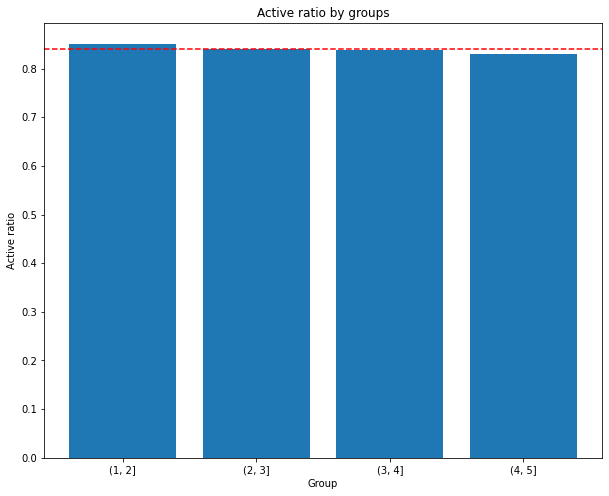

In [42]:
visualize_analysis(months_analysis, global_mean)

## Analiza według Card Category

Card_Category oznacza rodzaj posiadanej karty. Zgodnie z intuicją możemy roboczo założyć, że im dłużej ktoś posiada kartę, tym chętniej jej używa, więc odsetek kart aktywnych powinien rosnąć.

In [43]:
card_analysis = analyse_column("Card_Category")
card_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Card_Category,,,,
1. Blue,0.839021,9436,1519,0.000979
2. Silver,0.852252,555,82,-0.012252
3. Gold,0.818966,116,21,0.021034
4. Platinum,0.750000,20,5,0.090000


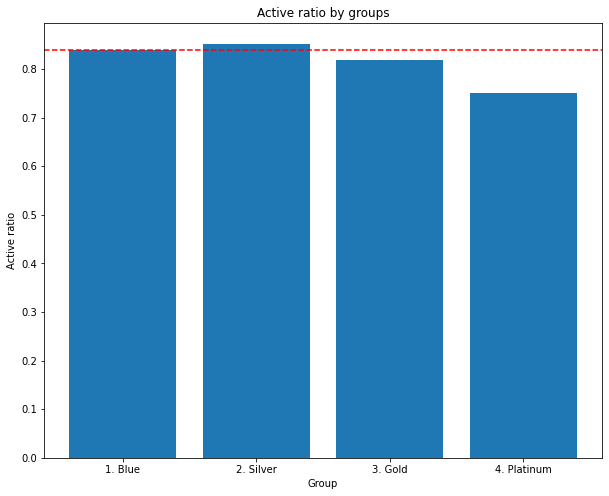

In [44]:
visualize_analysis(card_analysis, global_mean)

Na podstawie wyników w powyższej tabeli możemy powiedzieć, że również ta zmienna nic nie wnosi do analizy... Poza grupą 1. Blue, żadna nie posiada sensownej liczby (więcej niż 1000) dezaktywowanych kart. Z tego względu wizualizację pominiemy.

Analiza według Months Inactive 12 mon
Tę analizę pominiemy. Ponieważ liczba miesięcy bez aktywności w ciągu ostatnich miesięcy potencjalnie jest czynnikiem dezaktywacji kart – po 12 mc bez aktywności karta nie będzie używana.

## Analiza według Customer Age

Customer_Age oznacza wiek posiadacza karty i, podobnie jak Month_on_book, jest kolumną typu numerycznego, więc przez przystąpieniem do analizy pogrupujemy klientów na kategorie wiekowe co 10 lat.

Z opisu danych wiemy, że wiek klienta zaczyna się od 26 lat. Oprócz tego, 25% klientów jest w wieku powyżej 52 lat. Stwórzmy więc następujące koszyki wiekowe:

od 25 do 55 lat, co 5 lat (25-30), (30-35) itd,
55+

In [45]:
bins = list(range(25, 60, 5))  # wygenerowanie koszyków wiekowych od 25 do 55 lat
bins.append(75)  # maksymalny wiek to 73, więc dla spójności zaokrąglimy tę wartośc w górę

df["Customer_Age_agg"] = pd.cut(df["Customer_Age"], bins=bins)

In [46]:
age_analysis = analyse_column("Customer_Age_agg")
age_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Customer_Age_agg,,,,
"(25, 30]",0.879245,265,32,-0.039245
"(30, 35]",0.862385,654,90,-0.022385
"(35, 40]",0.851150,1478,220,-0.011150
"(40, 45]",0.829505,2264,386,0.010495
"(45, 50]",0.835427,2388,393,0.004573
"(50, 55]",0.831139,1747,295,0.008861
"(55, 75]",0.841473,1331,211,-0.001473


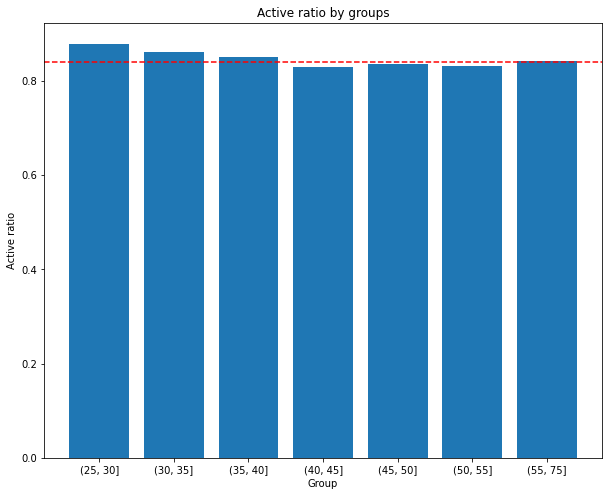

In [47]:
visualize_analysis(age_analysis, global_mean)

Niestety i w tym przypadku nie możemy mówić o sukcesie – klienci odchodzili bez względu na wiek.

## Analiza według Total Trans Amt

Total_Trans_Amt mówi nam o kwocie transakcji wykonanych na karcie w przeciągu ostatniego roku. Jest to kolejna kolumna typu numerycznego, którą w pierwszej kolejności pogrupujemy. Ponieważ najniższą wartością dostępną w danych jest 510, grupowanie zaczniemy od 500. Ze względu na dość duży rozrzut pomiędzy III kwartylem (4.700) a wartością maksymalną (20.000), koszyki ustawimy następująco:

od 500 do 5.000 co 500,
5.000 - 20.000

In [49]:
bins = list(range(500, 5500, 500))
bins.append(20000)

In [50]:
df["Total_Trans_Amt_agg"] = pd.cut(df["Total_Trans_Amt"], bins=bins)

In [51]:
total_trans_amt_analysis = analyse_column("Total_Trans_Amt_agg")
total_trans_amt_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Total_Trans_Amt_agg,,,,
"(500, 1000]",0.117284,162,143,0.722716
"(1000, 1500]",0.906840,848,79,-0.066840
"(1500, 2000]",0.791319,1198,250,0.048681
"(2000, 2500]",0.488327,1028,526,0.351673
"(2500, 3000]",0.567322,661,286,0.272678
"(3000, 3500]",0.944898,490,27,-0.104898
"(3500, 4000]",0.992231,901,7,-0.152231
"(4000, 4500]",0.998708,1548,2,-0.158708
"(4500, 5000]",0.963675,1404,51,-0.123675


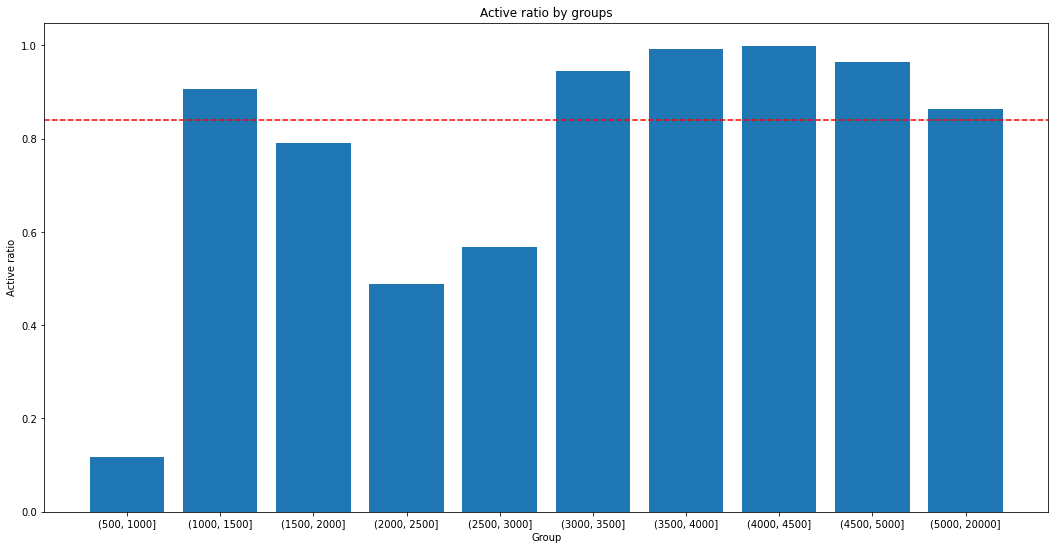

In [54]:
global_mean = df["Is_Active"].mean()  # określenie globalnego poziomu aktywnych kart
visualize_analysis(total_trans_amt_analysis, global_mean)

W przypadku tej zmiennej dane wyglądają zdecydowanie ciekawiej w porównaniu do poprzednich, które analizowaliśmy. Na podstawie wykresu oraz tabeli możemy powiedzieć, że mamy do czynienia z trzema grupami, które cechowały się silnym odpływem klientów:

(500, 1000] - tutaj liczba aktywnych kart na koniec okresu jest najmniejsza, jednak jest to również mało liczebna grupa pod kątem ogólnej liczby kart (162). Pomimo że liczba kart dezaktywowanych jest wysoka (142), ze względu na stosunkowo niską liczebność grupy w ogóle populacji pominiemy ją dalej,
(1500, 2000] - wartość względna (4,8%) liczby aktywnych kart jest niższa od średniej globalnej. Jest to jednak wartość za niska, aby określić ją jako istotną na tym etapie, w tym przypadku powinniśmy posłużyć się hipotezami statystycznymi (tutaj przydałaby się ANOVA),
(2000, 2500] - ta grupa zdecydowanie spełnia wszystkie wymagania: jest liczna (ponad 1 tyś wierszy) oraz posiada dużą liczbę dezaktywowanych kart (528),
(2500, 3000] - tak jak grupa (2000, 2500].

Podsumowując, z tego kroku do dalszej oceny zostaną wybrane dwie grupy:

(2000, 2500]
(2500, 3000]

# Analiza według Total Trans Ct

Kolumna Total_Trans_Ct określa, ile transakcji zostało wykonanych w przeciągu ostatniego roku na karcie kredytowej. Jest to kolejna kolumna numeryczna, którą poddamy kategoryzacji, robiąc to w przedziałach co 10, czyli od 10 (minimum) do 140 (139 to maksimum).

In [55]:
df["Total_Trans_Ct"].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

In [57]:
df["Total_Trans_Ct_agg"] = pd.cut(df["Total_Trans_Ct"], bins=range(0, 150, 10)) #podzielenie na przedziały co 10

In [58]:
total_tranc_ct_analysis = analyse_column("Total_Trans_Ct_agg")
total_tranc_ct_analysis

,Active_Ratio,Group_Size,Deactivated_Amount,Deviation_From_Global
Total_Trans_Ct_agg,,,,
"(0, 10]",0.000000,4,4,0.840000
"(10, 20]",0.330435,115,77,0.509565
"(20, 30]",0.787565,579,123,0.052435
"(30, 40]",0.671774,1240,407,0.168226
"(40, 50]",0.515966,1190,576,0.324034
"(50, 60]",0.778020,919,204,0.061980
"(60, 70]",0.923827,1641,125,-0.083827
"(70, 80]",0.957650,1889,80,-0.117650
"(80, 90]",0.979777,1434,29,-0.139777


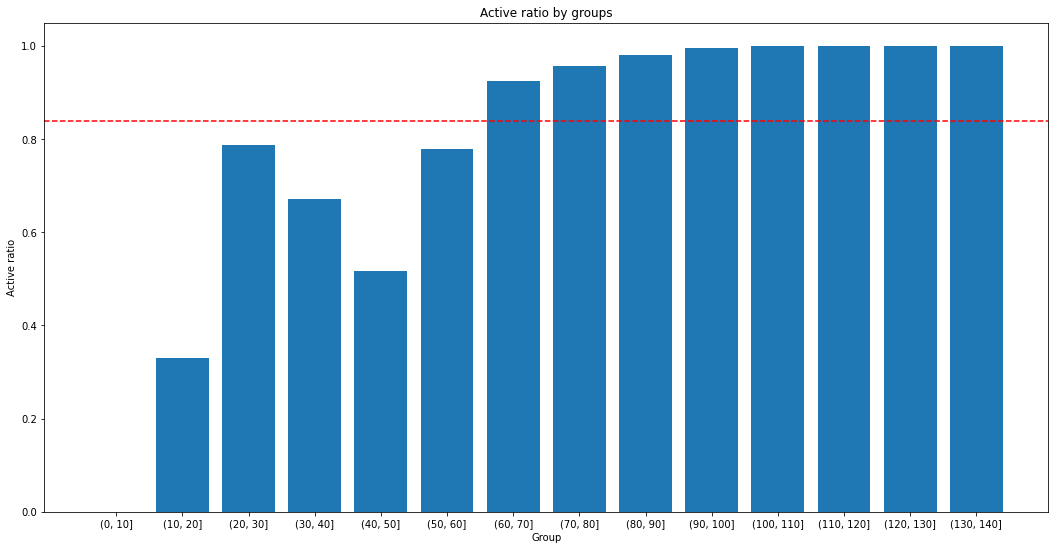

In [59]:
visualize_analysis(total_tranc_ct_analysis, global_mean)

Przyglądając się tabelce oraz wykresowi, możemy stwierdzić, że podobnie jak w przypadku zmiennej Total_Trans_Amt, do potencjalnej selekcji możemy wyodrębnić grupy: (30, 40] oraz (40, 50] ze względu na duży odchyłek od średniej globalnej oraz zadowalającą liczebność. Grupy takie jak (0, 10], (10, 20], czy (20, 30] posiadają za mało obserwacji albo w ogóle grupy, albo w liczbie dezaktywowanych kart.

Zauważmy, że ponownie mamy dwie istotne grupy. Można więc wysnuć wniosek, że być może te i grupy wcześniej wybrane na podstawie kolumny Total_Trans_Amt są ze sobą powiązane. Aby do zweryfikować (subiektywnie), możemy posłużyć się narzędziem dobrze znanym z Excel – tabelą przestawną (ang. pivot table), która może wyświetlić liczebności zarówno w grupie Total_Trans_Amt,jak i Total_Trans_Ct. Na przykładzie wyjaśnimy logikę tego podejścia.

Aby stworzyć tabelę przestawną, użyjemy metody pivot_table. Należy do niej przekazać ramkę danych, którą chcemy przetworzyć, wraz z informacją, co ma być na wierszach (index), a co na kolumnach columns. Co więcej, możemy wybrać dowolną kolumnę, którą chcemy podsumować (values) wraz z funkcją agregacji aggfunc.

Ponieważ chcemy otrzymać liczebności, przyjmiemy, że podsumować chcemy kolumnę Gender, a jako metodę agregacji użyjemy count:

In [63]:
amt_vs_ct = pd.pivot_table(
    df,  # ramka danych, którą chcemy przetworzyć
    index="Total_Trans_Ct_agg",  # określenie kolumny, której wartości mają być na wierszach
    columns="Total_Trans_Amt_agg",  # określenie kolumny, której wartości mają być na kolumnach
    values="Gender",  # określenie kolumny, którą chcemy zagregować
    aggfunc="count"  # określenie funkcji agregacji kolumny Gender
)
amt_vs_ct

Total_Trans_Amt_agg,"(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]","(2500, 3000]","(3000, 3500]","(3500, 4000]","(4000, 4500]","(4500, 5000]","(5000, 20000]"
Total_Trans_Ct_agg,,,,,,,,,,
"(0, 10]",4,0,0,0,0,0,0,0,0,0
"(10, 20]",79,30,6,0,0,0,0,0,0,0
"(20, 30]",71,376,116,13,3,0,0,0,0,0
"(30, 40]",8,377,527,251,69,5,0,0,1,2
"(40, 50]",0,64,407,437,220,28,12,5,14,3
"(50, 60]",0,1,129,226,161,122,117,63,60,40
"(60, 70]",0,0,13,82,144,211,358,451,230,152
"(70, 80]",0,0,0,16,54,95,315,627,491,291
"(80, 90]",0,0,0,2,8,25,93,369,525,412


Tu należałoby zbadać korelację liniową dla tych grup

Na podstawie powyższego możemy ocenić, że te zmienne nie są w tych grupach powiązane – np. na przecięciu (wiersz/kolumna) (50, 60] / (2000, 2500] widzimy ponad 220 obserwacji.

Zatem użyjemy dodatkowo grup (30, 40] oraz (40, 50] z Total_Trans_Ct niezależnie od grup (2000, 2500], (2500, 3000] z Total_Trans_Amt.

## Przygotowanie do kolejnego notatnika
Zgodnie z analizą przeprowadzoną w poprzednim punkcie, do dalszej pracy wyselekcjonujemy tylko wybrane grupy. Tak otrzymany podzbiór zapiszemy w folderze processed, aby być w stanie określić różnice występujące pomiędzy grupami charakteryzującymi się podwyższonym odsetkiem dezaktywowanych kart kredytowych a ogółem populacji.

Credit_Cards_Selected.ipynb

In [61]:
amt_selector = df["Total_Trans_Amt_agg"].astype(str).isin(["(2000, 2500]", "(2500, 3000]"])
ct_selector = df["Total_Trans_Ct_agg"].astype(str).isin(["(30, 40]", "(40, 50]"])
to_select = amt_selector | ct_selector  # operator | oznacza potoczne lub, więc zostaną wybrane elemnty z jednego lub drugiego zbioru

selected = df.loc[to_select]
not_selected = df.loc[~to_select]

In [64]:
selected.shape

(3142, 26)

Otrzymaliśmy zatem finalnie 977 kart kredytowych ogółem, czas na zapisanie danych do nowego pliku, który posłuży nam później. Dodatkowo zapiszemy również przeprocesowane dane, aby uwzględnić wszystkie operacje wykonane wcześniej. W przypadku tworzenia lokalnej kopii można posłużyć się poniższym fragmentem kodu:

In [65]:
selected.to_csv(
    "./BankChurner_Deactivated.csv",
    sep=";",
    index=False
)

not_selected.to_csv(
    "./BankChurner_Active.csv",
    sep=";",
    index=False
)

## Podsumowanie
W tym notatniku przeszliśmy kompleksowo przez proces analizy danych, w którym:

stworzyliśmy metody analyse_column oraz visualize_analysis, które uprościły i ujednoliciły proces analityczny,
przeanalizowaliśmy posiadane zmienne jedna po drugiej oraz omówiliśmy ich istotność lub nie w kontekście dalszej analityki,
poznaliśmy ograniczenia wynikające z braku używania narzędzi statystyki matematycznej – wyciągnięte wnioski są subiektywne i niepoparte ścisłym procesem,
wyodrębniliśmy dwie grupy, które różnicują naszą wyjściową populację,
przygotowaliśmy dane do dalszej analizy.
W kolejnym notatniku porównamy dwie grupy i stwierdzimy, czym tak naprawdę się one różnią i co mogło być przyczyną wysokiego odsetka dezaktywowanych kart.